# Análise exploratória para verificar possíveis correlações
**Importante!** Este notebook foi desenvolvido como parte de um projeto de iniciação científica em 2024. Devido à natureza sensível dos dados contidos nos dataframes utilizados para as análises, optamos por omiti-los. Assim, o notebook não é executável e tem como finalidade exclusivamente a apresentação dos resultados.

---



## 0. Configurações

In [ ]:
!pip install plot-likert

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core import display as ICD
import matplotlib as mp
import plot_likert
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

In [ ]:
sns.set_theme(style="whitegrid")
plt.rcParams['figure.dpi'] = 250
plt.rcParams['savefig.dpi'] = 250

In [ ]:
cores = [plot_likert.colors.TRANSPARENT,
        "red",
        "salmon",
        "lightgray",
        "cornflowerblue",
        "blue"]

## 1. Leitura dos dados

## 2. Limpeza

In [ ]:
# Funcionarios
df_funcionarios.drop(['Quão confortável você se sente em cada um dos ambientes abaixo?'], axis = 1, inplace = True)

# Docentes
colunas_filtradas_docentes = ['Quão confortável você se sente em cada um dos ambientes abaixo?:Salas de aula',
                              'Quão confortável você se sente em cada um dos ambientes abaixo?:Laboratórios',
                              'Quão confortável você se sente em cada um dos ambientes abaixo?:Biblioteca',
                              'Quão confortável você se sente em cada um dos ambientes abaixo?:Restaurante universitário',
                              'Quão confortável você se sente em cada um dos ambientes abaixo?:Moradia',
                              'Quão confortável você se sente em cada um dos ambientes abaixo?:Centro de esportes do campus',
                              'Quão confortável você se sente em cada um dos ambientes abaixo?:Eventos culturais no campus',
                              'Quão confortável você se sente em cada um dos ambientes abaixo?:Transporte ou estacionamentos no campus',
                              'Quão confortável você se sente em cada um dos ambientes abaixo?:Calçadas e ruas do campus',
                              'Quão confortável você se sente em cada um dos ambientes abaixo?:Outros edifícios do campus']

df_docentes.drop(colunas_filtradas_docentes, axis = 1, inplace = True)

## 3. Investigação sobre a confiança em se formar

### 3.1 Ano de ingresso

A confiança em se formar vaira conforme o ano de ingresso na graduação?

#### Limpeza e configurações

In [ ]:
escala_concordancia = ['Discordo fortemente', 'Nem concordo nem discordo', 'Concordo',
       'Concordo fortemente', 'Não se aplica', 'Discordo']

In [ ]:
# eliminando valores que não estão nesse intervalo

df_graduacao = df_graduacao[(df_graduacao['Qual o seu ano de ingresso como aluno(a) de graduação na USP?'] >= 2002) & (df_graduacao['Qual o seu ano de ingresso como aluno(a) de graduação na USP?'] <= 2022)]

In [ ]:
df_graduacao['Qual o seu ano de ingresso como aluno(a) de graduação na USP?'].values.tolist()

[2022.0,
 2022.0,
 2013.0,
 2019.0,
 2022.0,
 2020.0,
 2021.0,
 2019.0,
 2022.0,
 2018.0,
 2020.0,
 2020.0,
 2016.0,
 2022.0,
 2022.0,
 2020.0,
 2017.0,
 2016.0,
 2019.0,
 2020.0,
 2022.0,
 2020.0,
 2019.0,
 2022.0,
 2021.0,
 2022.0,
 2019.0,
 2022.0,
 2020.0,
 2020.0,
 2020.0,
 2020.0,
 2019.0,
 2020.0,
 2022.0,
 2022.0,
 2022.0,
 2021.0,
 2022.0,
 2018.0,
 2020.0,
 2020.0,
 2020.0,
 2019.0,
 2022.0,
 2022.0,
 2018.0,
 2022.0,
 2021.0,
 2022.0,
 2017.0,
 2022.0,
 2022.0,
 2022.0,
 2022.0,
 2020.0,
 2019.0,
 2022.0,
 2022.0,
 2022.0,
 2017.0,
 2022.0,
 2020.0,
 2017.0,
 2022.0,
 2022.0,
 2019.0,
 2022.0,
 2018.0,
 2022.0,
 2022.0,
 2022.0,
 2022.0,
 2018.0,
 2022.0,
 2021.0,
 2020.0,
 2020.0,
 2021.0,
 2017.0,
 2021.0,
 2022.0,
 2021.0,
 2021.0,
 2019.0,
 2022.0,
 2021.0,
 2018.0,
 2021.0,
 2018.0,
 2020.0,
 2022.0,
 2022.0,
 2020.0,
 2022.0,
 2020.0,
 2022.0,
 2022.0,
 2022.0,
 2021.0,
 2022.0,
 2021.0,
 2021.0,
 2021.0,
 2022.0,
 2022.0,
 2022.0,
 2017.0,
 2022.0,
 2022.0,
 2022.0,
 

In [ ]:
min(df_graduacao['Qual o seu ano de ingresso como aluno(a) de graduação na USP?'])

2002.0

In [ ]:
max(df_graduacao['Qual o seu ano de ingresso como aluno(a) de graduação na USP?'])

2022.0

#### tabela_geral cruzada

Selecionando a variável e a escala de respostas que a contempla

In [ ]:
questao_formatura = 'As perguntas a seguir se referem à sua experiência acadêmica (aproveitamento acadêmico, oportunidades para estágio, qualificação adequada, etc) na USP:Eu me sinto confiante de que vou concluir o meu curso/formação atual na USP.'

In [ ]:
respostas_formatura = df_graduacao['As perguntas a seguir se referem à sua experiência acadêmica (aproveitamento acadêmico, oportunidades para estágio, qualificação adequada, etc) na USP:Eu me sinto confiante de que vou concluir o meu curso/formação atual na USP.'].unique().tolist()
respostas_formatura

['Discordo fortemente',
 'Nem concordo nem discordo',
 'Concordo',
 'Concordo fortemente',
 'Não se aplica',
 'Discordo',
 nan]

In [ ]:
# Usando pd.Categorical para garantir que os rótulos estejam na ordem correta
df_graduacao['questao_formatura'] = pd.Categorical(df_graduacao[questao_formatura], categories=respostas_formatura, ordered=True)


# Definindo os intervalos de 5 anos
intervalos = list(range(2000, 2023, 5))

# Usando pd.cut() para agrupar os valores em intervalos de 5 anos
df_graduacao['grupo_5_anos'] = pd.cut(df_graduacao['Qual o seu ano de ingresso como aluno(a) de graduação na USP?'], bins=intervalos, right=False)


# Contando o número de alunos em cada intervalo de 5 anos
contagem_alunos = df_graduacao.groupby('grupo_5_anos').size().reset_index(name='numero_alunos')
# Contando o número de votos para cada rótulo em cada intervalo de 5 anos

contagem_votos = df_graduacao.groupby(['grupo_5_anos', questao_formatura]).size().reset_index(name='count')

# Pivotando a tabela_geral_geral_geral para ter os rótulos de voto como colunas
contagem_votos_pivot = contagem_votos.pivot(index='grupo_5_anos', columns=questao_formatura, values='count').reset_index()

# Combinando os resultados em um único DataFrame
contagem_final = pd.merge(contagem_alunos, contagem_votos_pivot, on='grupo_5_anos', how='left')

# Preenchendo os valores NaN com 0
contagem_final.fillna(0, inplace=True)

# Exibindo a contagem de alunos e votos por rótulo por intervalo de 5 anos
contagem_final


ValueError: ignored

In [ ]:
# Dúvida em como renomear essa frase enorme que é a questao_formatura
intervalos = list(range(2000, 2023, 5))

# agrupar pelos intervalos
df_graduacao['grupo_5_anos'] = pd.cut(df_graduacao['Qual o seu ano de ingresso como aluno(a) de graduação na USP?'], bins=intervalos, right=False)

tabela_geral_cruzada = pd.crosstab(df_graduacao['grupo_5_anos'], df_graduacao[questao_formatura], margins=True, margins_name='Total')

tabela_geral_cruzada

In [ ]:
# Crie o gráfico de barras usando Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='Qual o seu ano de ingresso como aluno(a) de graduação na USP?', y='Quantidade', hue='Respostas', data=df_melted)
plt.title('Respostas por Ano de Ingresso')
plt.xlabel('Ano de Ingresso')
plt.ylabel('Quantidade')
plt.xticks(rotation=45)
plt.show()

In [ ]:
contagem_filtrada = contagem_final[(contagem_final['Qual o seu ano de ingresso como aluno(a) de graduação na USP?'] >= 2015)]

In [ ]:
# Melt o DataFrame para ter uma coluna para tipo de resposta
df_melted = pd.melt(contagem_filtrada, id_vars='Qual o seu ano de ingresso como aluno(a) de graduação na USP?',
                   value_vars=respostas_formatura,
                   var_name='Respostas', value_name='Quantidade')

# Crie o gráfico de barras usando Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='Qual o seu ano de ingresso como aluno(a) de graduação na USP?', y='Quantidade', hue='Respostas', data=df_melted)
plt.title('Respostas por Ano de Ingresso')
plt.xlabel('Ano de Ingresso')
plt.ylabel('Quantidade')
plt.xticks(rotation=45)
plt.show()

## Percepção do ambiente e Formatura

Alunos que consideram a usp um ambiente hostil se avaliam como menos confiantes em chegar ao final do curso?

A raça impacta essa percepção de hostilidade?


### Percepção do ambiente para cada df

In [ ]:
# graduacao
tabela_grad = df_graduacao

df_graduacao.loc[df_graduacao['A partir da sua experiência dentro do campus da USP, como você sente os ambientes institucionais, na maior parte do tempo?']=='1 Hostil', 'A partir da sua experiência dentro do campus da USP, como você sente os ambientes institucionais, na maior parte do tempo?'] = '1'


df_graduacao.loc[df_graduacao['A partir da sua experiência dentro do campus da USP, como você sente os ambientes institucionais, na maior parte do tempo?']=='5 Amigável','A partir da sua experiência dentro do campus da USP, como você sente os ambientes institucionais, na maior parte do tempo?'] = '5'

df_graduacao.loc[df['Unnamed: 85']=='1 Desrespeitoso', 'Unnamed: 85']='1'

df_graduacao.loc[df_graduacao['Unnamed: 85']=='5 Respeitoso', 'Unnamed: 85']='5'
df_graduacao.loc[df_graduacao['Unnamed: 86']=='1 Não Acolhedor', 'Unnamed: 86'] ='1'
df_graduacao.loc[df_graduacao['Unnamed: 86']=='5 Acolhedor', 'Unnamed: 86'] ='5'
df_graduacao.loc[df_graduacao['Unnamed: 87']=='1 Não-colaborativo', 'Unnamed: 87'] ='1'
df_graduacao.loc[df_graduacao['Unnamed: 87']=='5 Colaborativo', 'Unnamed: 87'] ='5'
df_graduacao.loc[df_graduacao['Unnamed: 88']=='1 Regredindo', 'Unnamed: 88'] ='1'
df_graduacao.loc[df_graduacao['Unnamed: 88']=='5 Melhorando', 'Unnamed: 88'] ='5'

tabela_grad['hostil - amigável'] = df_graduacao['A partir da sua experiência dentro do campus da USP, como você sente os ambientes institucionais, na maior parte do tempo?']
tabela_grad['Desrespeitoso - respeitoso'] = df_graduacao['Unnamed: 85']
tabela_grad['Não Acolhedor - Acolhedor'] = df_graduacao['Unnamed: 86']
tabela_grad['Não-colaborativo - colaborativo'] = df_graduacao['Unnamed: 87']
tabela_grad['regredindo - melhorando'] = df_graduacao['Unnamed: 88']


tabela_grad = tabela_grad[['hostil - amigável','Desrespeitoso - respeitoso', 'Não Acolhedor - Acolhedor', 'Não-colaborativo - colaborativo', 'regredindo - melhorando']]

In [ ]:
# pos graduação

tabela_pos_grad = df_pos_graduacao

df_pos_graduacao.loc[df_pos_graduacao['A partir da sua experiência dentro do campus da USP, como você sente os ambientes institucionais, na maior parte do tempo?']=='1 Hostil', 'A partir da sua experiência dentro do campus da USP, como você sente os ambientes institucionais, na maior parte do tempo?'] = '1'


df_pos_graduacao.loc[df_pos_graduacao['A partir da sua experiência dentro do campus da USP, como você sente os ambientes institucionais, na maior parte do tempo?']=='5 Amigável','A partir da sua experiência dentro do campus da USP, como você sente os ambientes institucionais, na maior parte do tempo?'] = '5'

df_pos_graduacao.loc[df['Unnamed: 85']=='1 Desrespeitoso', 'Unnamed: 85']='1'

df_pos_graduacao.loc[df_pos_graduacao['Unnamed: 85']=='5 Respeitoso', 'Unnamed: 85']='5'
df_pos_graduacao.loc[df_pos_graduacao['Unnamed: 86']=='1 Não Acolhedor', 'Unnamed: 86'] ='1'
df_pos_graduacao.loc[df_pos_graduacao['Unnamed: 86']=='5 Acolhedor', 'Unnamed: 86'] ='5'
df_pos_graduacao.loc[df_pos_graduacao['Unnamed: 87']=='1 Não-colaborativo', 'Unnamed: 87'] ='1'
df_pos_graduacao.loc[df_pos_graduacao['Unnamed: 87']=='5 Colaborativo', 'Unnamed: 87'] ='5'
df_pos_graduacao.loc[df_pos_graduacao['Unnamed: 88']=='1 Regredindo', 'Unnamed: 88'] ='1'
df_pos_graduacao.loc[df_pos_graduacao['Unnamed: 88']=='5 Melhorando', 'Unnamed: 88'] ='5'

tabela_pos_grad['hostil - amigável'] = df_pos_graduacao['A partir da sua experiência dentro do campus da USP, como você sente os ambientes institucionais, na maior parte do tempo?']
tabela_pos_grad['Desrespeitoso - respeitoso'] = df_pos_graduacao['Unnamed: 85']
tabela_pos_grad['Não Acolhedor - Acolhedor'] = df_pos_graduacao['Unnamed: 86']
tabela_pos_grad['Não-colaborativo - colaborativo'] = df_pos_graduacao['Unnamed: 87']
tabela_pos_grad['regredindo - melhorando'] = df_pos_graduacao['Unnamed: 88']


tabela_pos_grad = tabela_pos_grad[['hostil - amigável','Desrespeitoso - respeitoso', 'Não Acolhedor - Acolhedor', 'Não-colaborativo - colaborativo', 'regredindo - melhorando']]

In [ ]:
# pos doc
tabela_pos_doc = df_pos_doutorado

df_pos_doutorado.loc[df_pos_doutorado['A partir da sua experiência dentro do campus da USP, como você sente os ambientes institucionais, na maior parte do tempo?']=='1 Hostil', 'A partir da sua experiência dentro do campus da USP, como você sente os ambientes institucionais, na maior parte do tempo?'] = '1'


df_pos_doutorado.loc[df_pos_doutorado['A partir da sua experiência dentro do campus da USP, como você sente os ambientes institucionais, na maior parte do tempo?']=='5 Amigável','A partir da sua experiência dentro do campus da USP, como você sente os ambientes institucionais, na maior parte do tempo?'] = '5'

df_pos_doutorado.loc[df['Unnamed: 85']=='1 Desrespeitoso', 'Unnamed: 85']='1'

df_pos_doutorado.loc[df_pos_doutorado['Unnamed: 85']=='5 Respeitoso', 'Unnamed: 85']='5'
df_pos_doutorado.loc[df_pos_doutorado['Unnamed: 86']=='1 Não Acolhedor', 'Unnamed: 86'] ='1'
df_pos_doutorado.loc[df_pos_doutorado['Unnamed: 86']=='5 Acolhedor', 'Unnamed: 86'] ='5'
df_pos_doutorado.loc[df_pos_doutorado['Unnamed: 87']=='1 Não-colaborativo', 'Unnamed: 87'] ='1'
df_pos_doutorado.loc[df_pos_doutorado['Unnamed: 87']=='5 Colaborativo', 'Unnamed: 87'] ='5'
df_pos_doutorado.loc[df_pos_doutorado['Unnamed: 88']=='1 Regredindo', 'Unnamed: 88'] ='1'
df_pos_doutorado.loc[df_pos_doutorado['Unnamed: 88']=='5 Melhorando', 'Unnamed: 88'] ='5'

tabela_pos_doc['hostil - amigável'] = df_pos_doutorado['A partir da sua experiência dentro do campus da USP, como você sente os ambientes institucionais, na maior parte do tempo?']
tabela_pos_doc['Desrespeitoso - respeitoso'] = df_pos_doutorado['Unnamed: 85']
tabela_pos_doc['Não Acolhedor - Acolhedor'] = df_pos_doutorado['Unnamed: 86']
tabela_pos_doc['Não-colaborativo - colaborativo'] = df_pos_doutorado['Unnamed: 87']
tabela_pos_doc['regredindo - melhorando'] = df_pos_doutorado['Unnamed: 88']


tabela_pos_doc = tabela_pos_doc[['hostil - amigável','Desrespeitoso - respeitoso', 'Não Acolhedor - Acolhedor', 'Não-colaborativo - colaborativo', 'regredindo - melhorando']]

### Graduação

In [ ]:
questao_hostilidade = df_graduacao['Você já experimentou pessoalmente algum tipo de discriminação, comportamento intimidador, hostilidade, bullying ou assédio moral na USP?']

In [ ]:
questao_formatura = 'As perguntas a seguir se referem à sua experiência acadêmica (aproveitamento acadêmico, oportunidades para estágio, qualificação adequada, etc) na USP:Eu me sinto confiante de que vou concluir o meu curso/formação atual na USP.'

# Usando pd.Categorical para garantir que os rótulos estejam na ordem correta
df_graduacao['questao_formatura'] = pd.Categorical(df_graduacao[questao_formatura], categories=respostas_formatura, ordered=True)

ValueError: ignored

In [ ]:
df_graduacao['A partir da sua experiência dentro do campus da USP, como você sente os ambientes institucionais, na maior parte do tempo?']

0       1
1       5
2       2
3       4
4       4
       ..
2996    4
2997    4
2998    5
2999    3
3000    3
Name: A partir da sua experiência dentro do campus da USP, como você sente os ambientes institucionais, na maior parte do tempo?, Length: 3001, dtype: object

In [ ]:
tabela_grad

,hostil - amigável,Desrespeitoso - respeitoso,Não Acolhedor - Acolhedor,Não-colaborativo - colaborativo,regredindo - melhorando
0,1,4,1,1,1
1,5,5,5,5,5
2,2,3,1,1,3
3,4,4,3,3,3
4,4,3,2,3,3
...,...,...,...,...,...
2996,4,5,4,3,4
2997,4,5,4,5,3
2998,5,4,5,4,4
2999,3,4,3,2,4


In [ ]:
varx = df_graduacao['As perguntas a seguir se referem à sua experiência acadêmica (aproveitamento acadêmico, oportunidades para estágio, qualificação adequada, etc) na USP:Eu me sinto confiante de que vou concluir o meu curso/formação atual na USP.']
vary = df_graduacao['hostil - amigável']

xlab = 'Eu me sinto confiante de que vou concluir o meu curso/formação atual na USP.'
ylab = '1 Hostil - 5 Amigável'

tab = pd.crosstab(vary, varx)

tab

"As perguntas a seguir se referem à sua experiência acadêmica (aproveitamento acadêmico, oportunidades para estágio, qualificação adequada, etc) na USP:Eu me sinto confiante de que vou concluir o meu curso/formação atual na USP.",Concordo,Concordo fortemente,Discordo,Discordo fortemente,Nem concordo nem discordo,Não se aplica
hostil - amigável,,,,,,
1,23,25,17,38,17,2
2,94,98,62,33,47,7
3,247,288,65,36,125,14
4,364,507,73,27,104,18
5,170,396,21,11,57,15


In [ ]:
df_graduacao['hostil - amigável'] = df_graduacao['hostil - amigável'].astype(int)

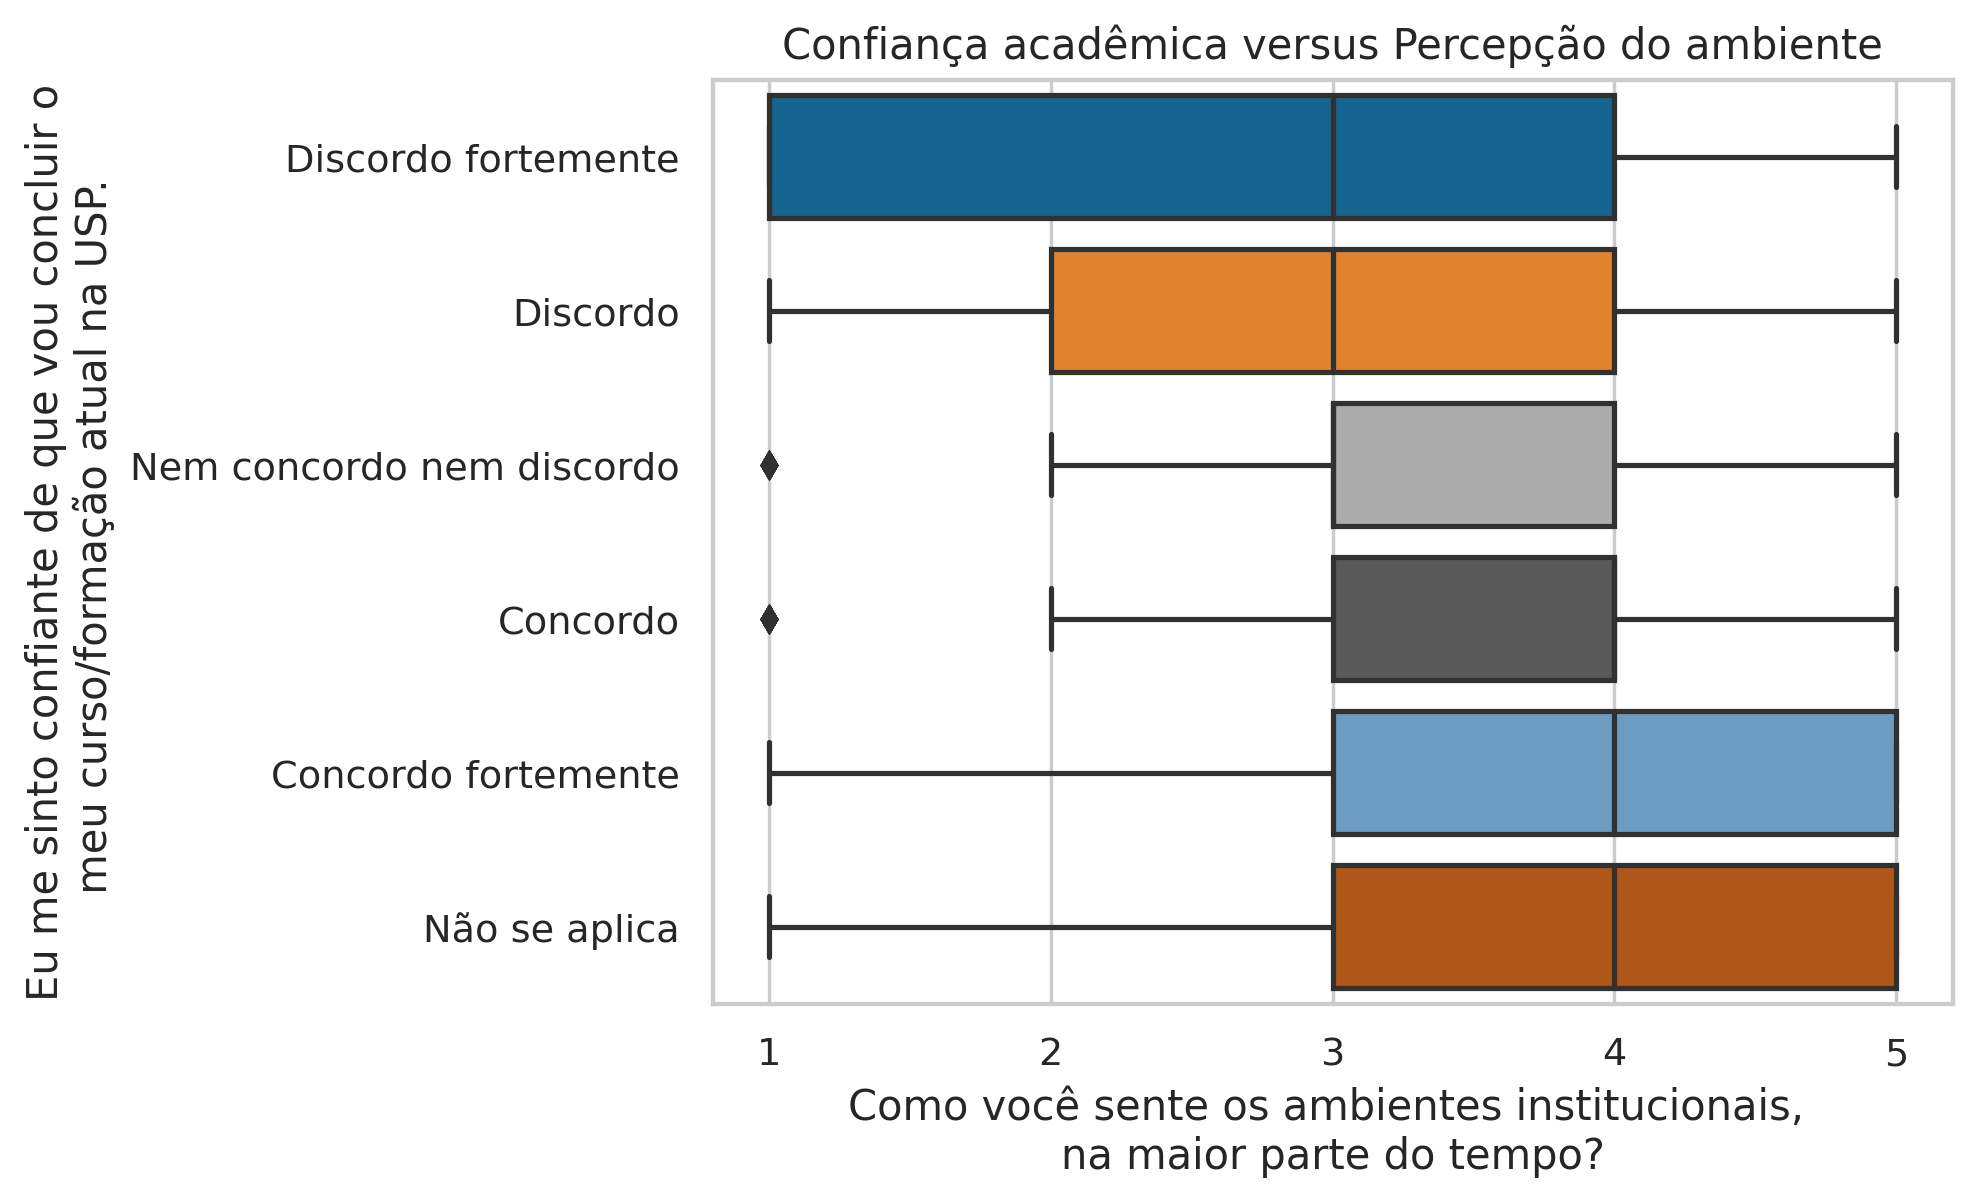

In [ ]:
plt.figure()

ax = sns.boxplot(x =df_graduacao['hostil - amigável'], y= df_graduacao['As perguntas a seguir se referem à sua experiência acadêmica (aproveitamento acadêmico, oportunidades para estágio, qualificação adequada, etc) na USP:Eu me sinto confiante de que vou concluir o meu curso/formação atual na USP.'], order=['Discordo fortemente','Discordo','Nem concordo nem discordo','Concordo', 'Concordo fortemente','Não se aplica'])
ax.set(ylabel='Eu me sinto confiante de que vou concluir o\n meu curso/formação atual na USP.', xlabel = 'Como você sente os ambientes institucionais, \nna maior parte do tempo?', title='Confiança acadêmica versus Percepção do ambiente')

# Definir os rótulos do eixo x como inteiros
plt.xticks(ticks=range(1, 6), labels=range(1, 6))


plt.show()

## Percepção vs Raça

In [ ]:
questao_raca =  df_graduacao['Qual sua cor/raça (critério IBGE)']

In [ ]:
varx_raca = df_graduacao['Qual sua cor/raça (critério IBGE)'].str.title()

xlab = 'Eu me sinto confiante de que vou concluir o meu curso/formação atual na USP.'
ylab = '1 Hostil - 5 Amigável'

tab_raca = pd.crosstab(df_graduacao['hostil - amigável'], df_graduacao['Qual sua cor/raça (critério IBGE)'].str.title())

tab_raca

Qual sua cor/raça (critério IBGE),Amarela,Branca,Indígena,Outro/Prefiro Não Responder,Parda,Preta
hostil - amigável,,,,,,
1,3,65,1,2,30,21
2,16,185,0,10,75,55
3,41,437,2,15,182,98
4,40,734,2,12,199,106
5,35,437,0,5,148,45


In [ ]:
sns.set_theme(style="whitegrid")
plt.style.use('tableau-colorblind10')
cores = sns.color_palette("colorblind")

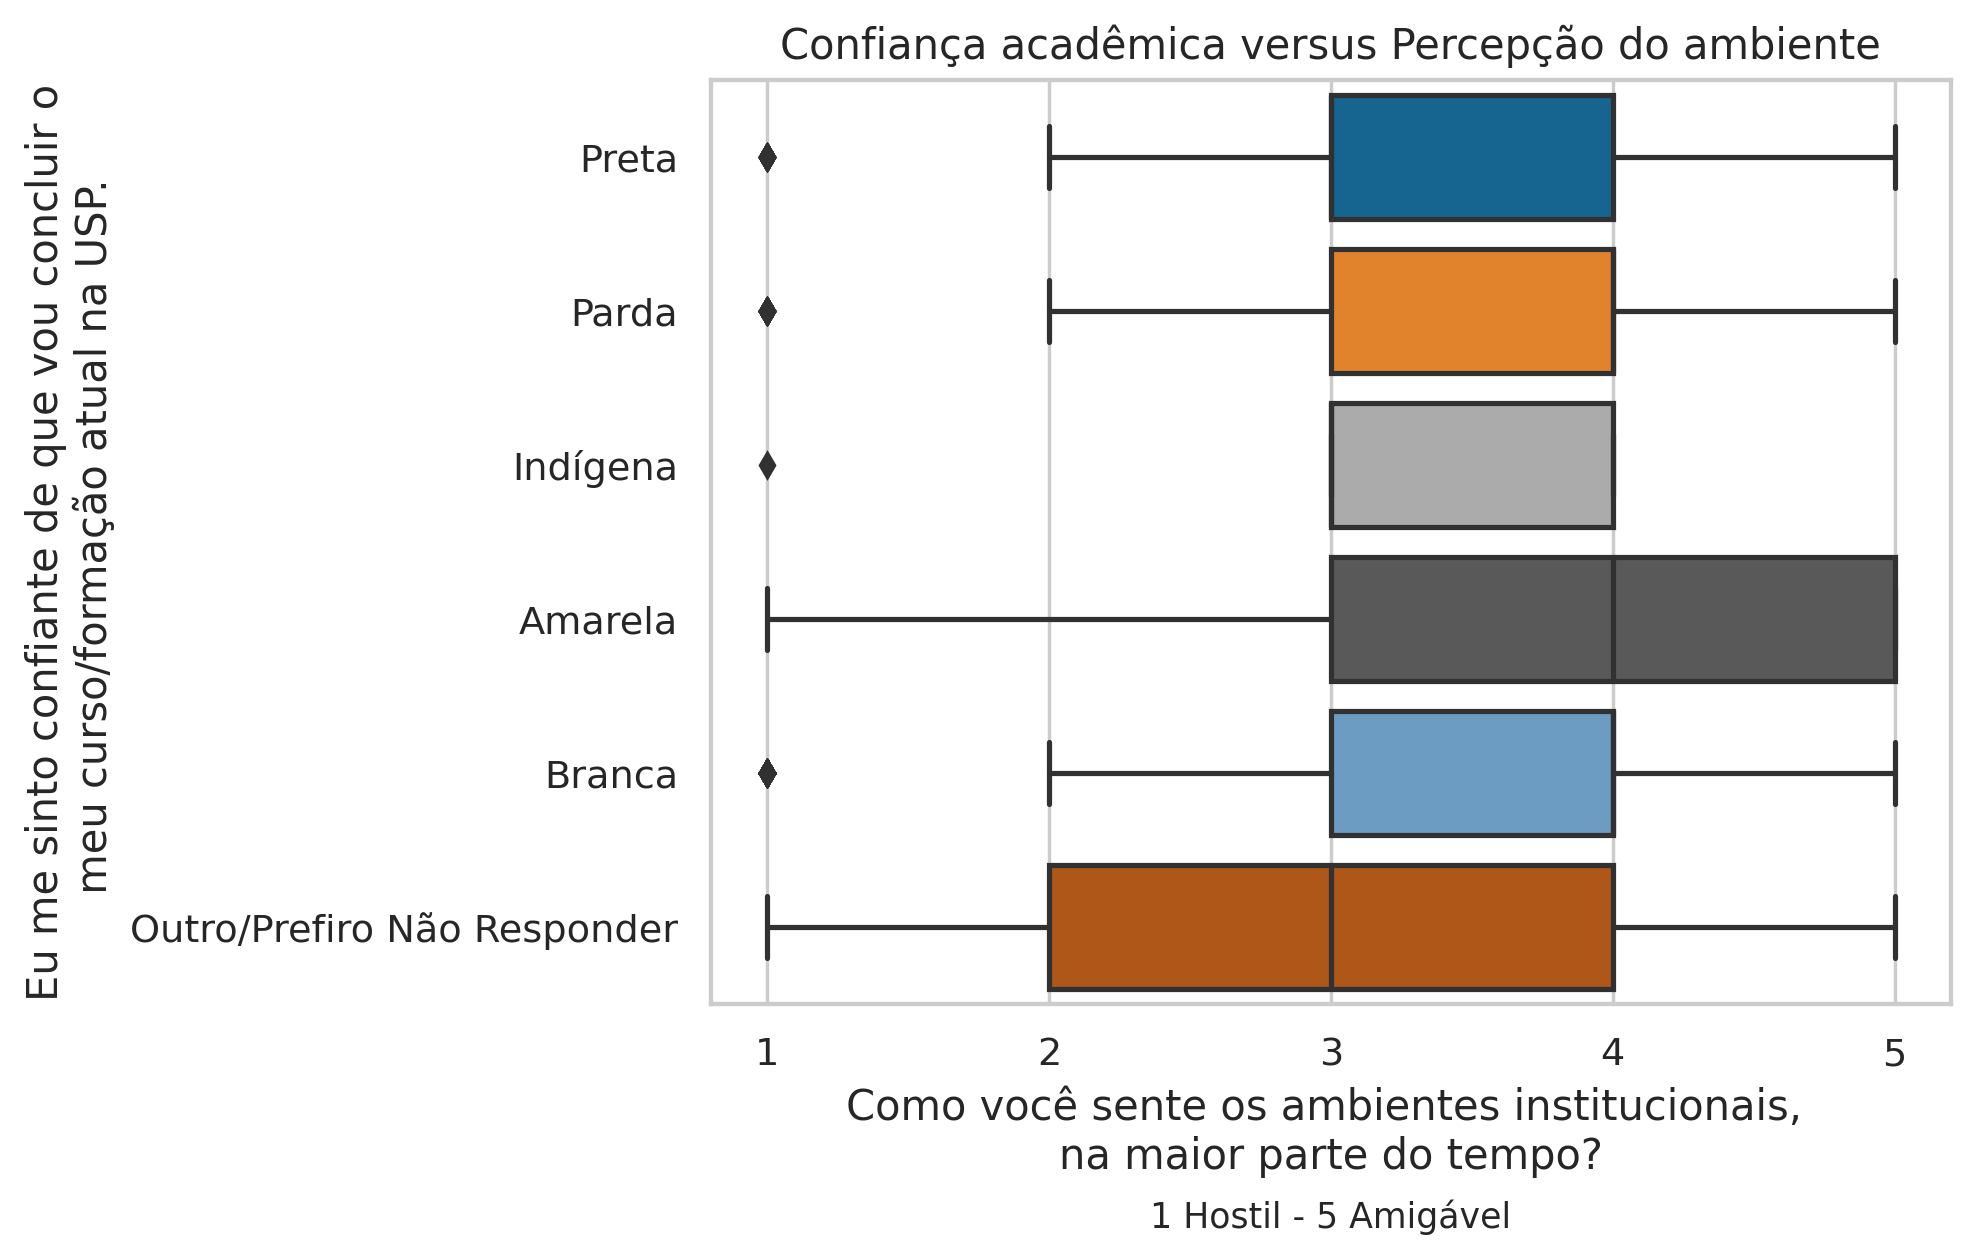

In [ ]:
plt.figure()

ax = sns.boxplot(x =df_graduacao['hostil - amigável'], y= varx_raca, order=['Preta','Parda','Indígena','Amarela', 'Branca','Outro/Prefiro Não Responder'])
ax.set(ylabel='Eu me sinto confiante de que vou concluir o\n meu curso/formação atual na USP.', xlabel = 'Como você sente os ambientes institucionais, \nna maior parte do tempo?', title=r'Confiança acadêmica versus Percepção do ambiente')

plt.text(0.5, -0.25, r'1 Hostil - 5 Amigável',
         fontsize=10,  # Tamanho de fonte para a parte específica do texto
         ha='center', va='bottom', transform=plt.gca().transAxes)
# Definir os rótulos do eixo x como inteiros
plt.xticks(ticks=range(1, 6), labels=range(1, 6))


plt.show()

---

## Percepção do ambiente vs bulliyng

#### Graduação

In [ ]:
tab_bulliyng = pd.crosstab(df_graduacao['hostil - amigável'], df_graduacao['Você já experimentou pessoalmente algum tipo de discriminação, comportamento intimidador, hostilidade, bullying ou assédio moral na USP?'])

tab_bulliyng

"Você já experimentou pessoalmente algum tipo de discriminação, comportamento intimidador, hostilidade, bullying ou assédio moral na USP?",Não,Prefiro não responder.,"Sim, e afetou meu bem-estar e/ou minhas atividades na USP.","Sim, mas não afetou meu bem-estar ou minhas atividades na USP."
hostil - amigável,,,,
1,23,6,78,13
2,132,18,143,46
3,417,38,206,111
4,803,36,124,129
5,562,7,42,58


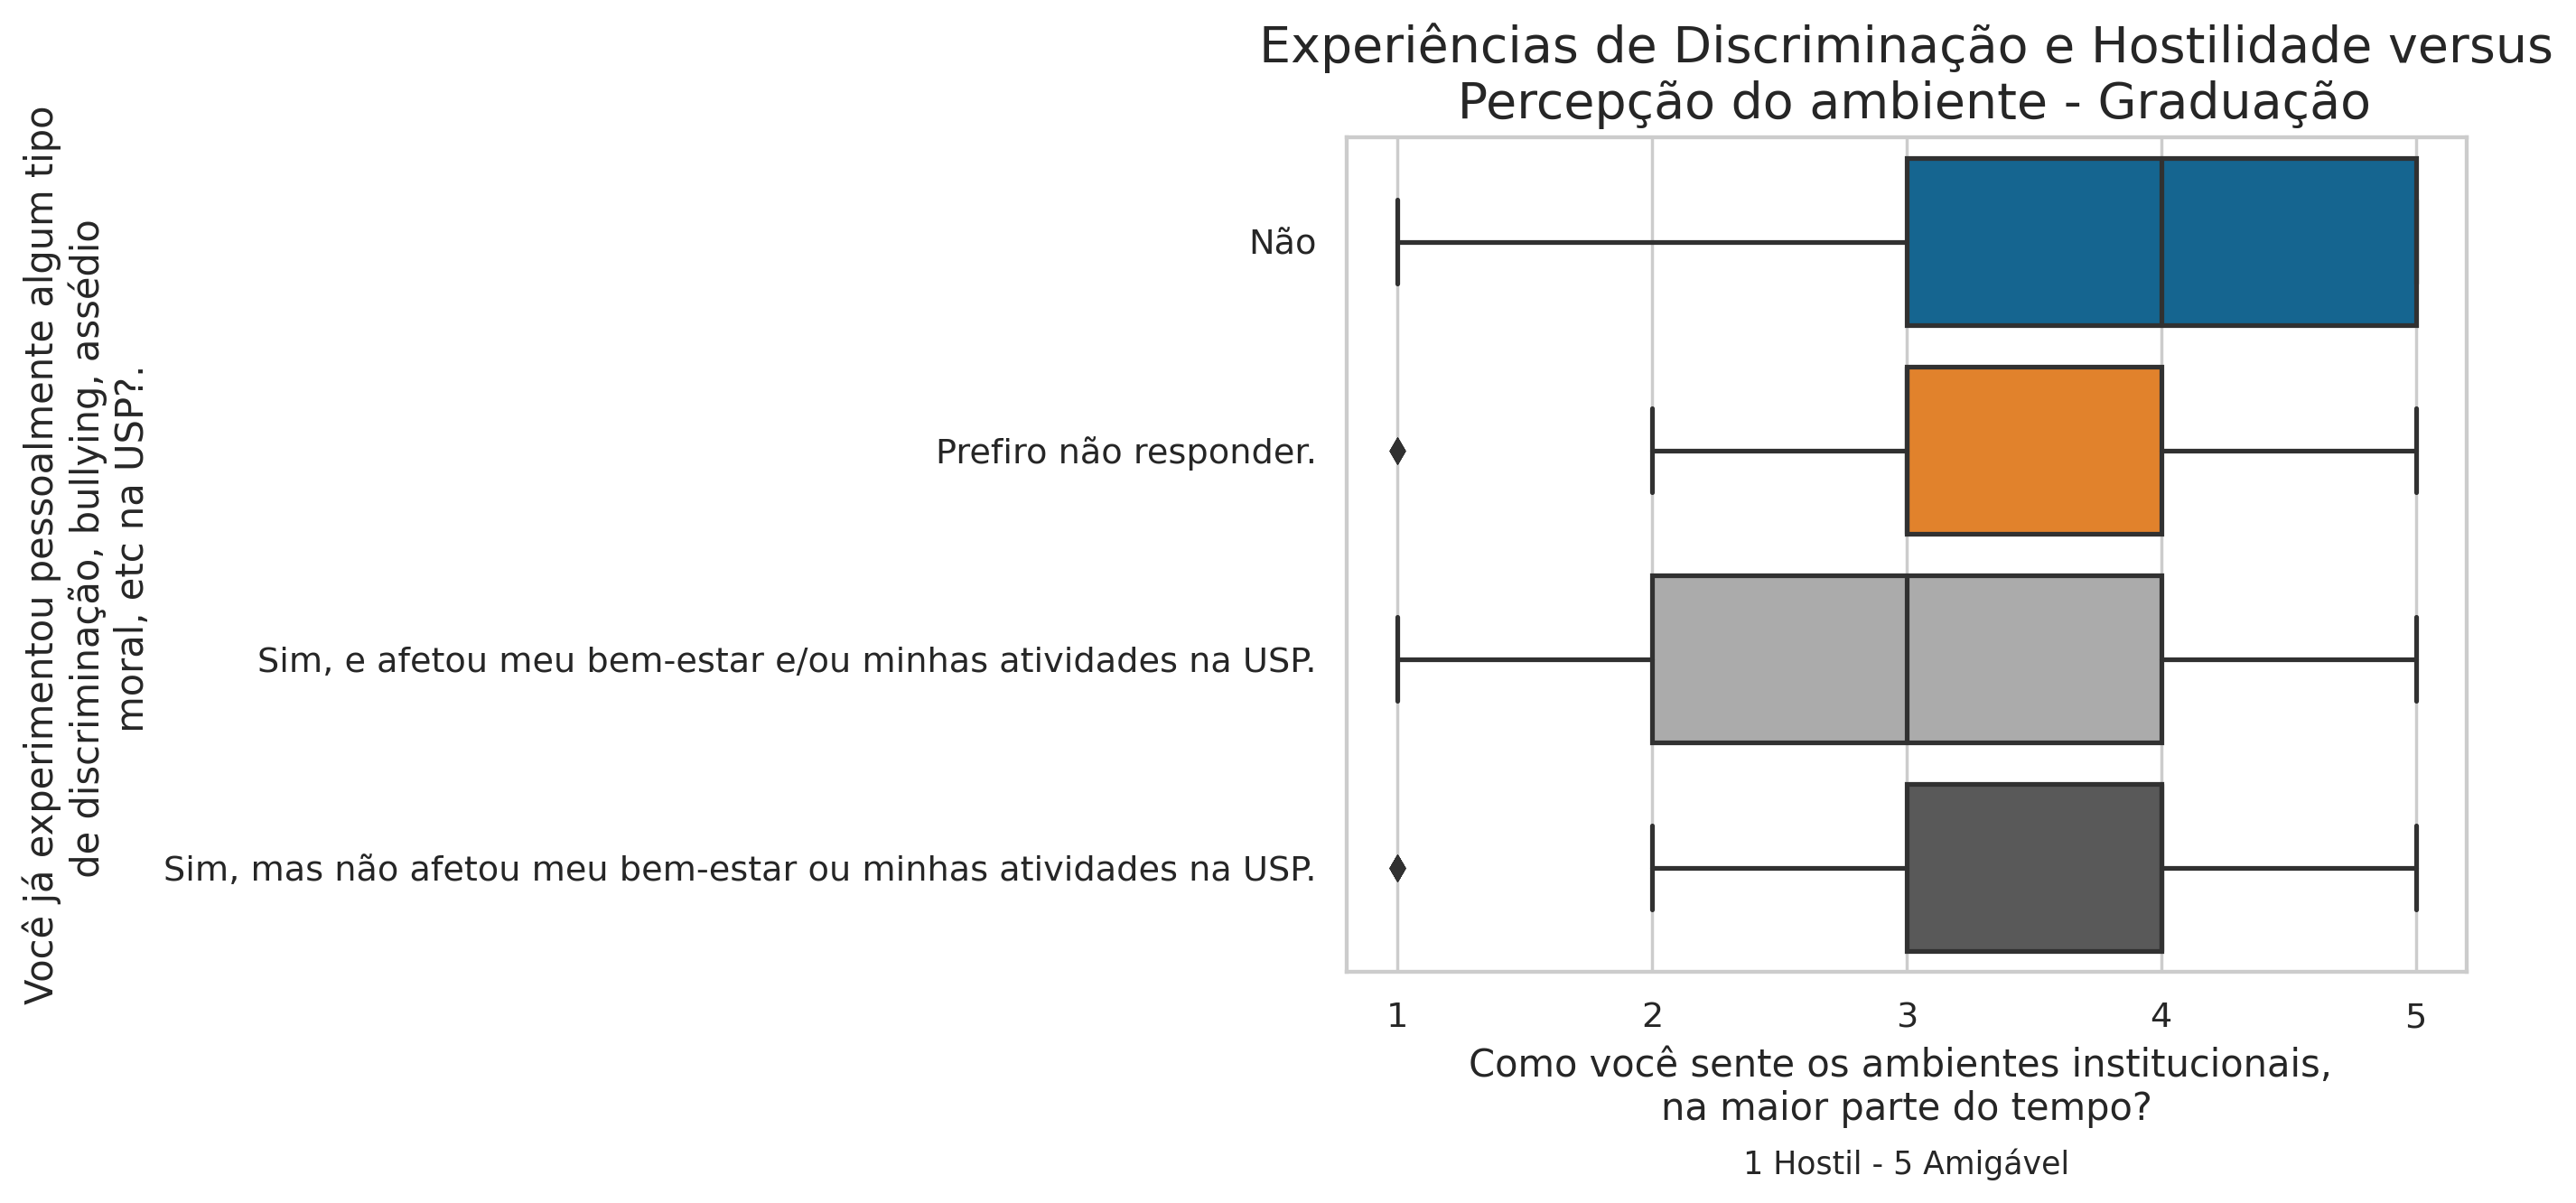

In [ ]:
plt.figure()

ax = sns.boxplot(x = df_graduacao['hostil - amigável'], y= df_graduacao['Você já experimentou pessoalmente algum tipo de discriminação, comportamento intimidador, hostilidade, bullying ou assédio moral na USP?'], order=['Não', 'Prefiro não responder.', 'Sim, e afetou meu bem-estar e/ou minhas atividades na USP.', 'Sim, mas não afetou meu bem-estar ou minhas atividades na USP.'])

ax.set(ylabel='Você já experimentou pessoalmente algum tipo\n de discriminação, bullying, assédio\n moral, etc na USP?.', xlabel = 'Como você sente os ambientes institucionais, \nna maior parte do tempo?')

plt.title('Experiências de Discriminação e Hostilidade versus\n Percepção do ambiente - Graduação', fontsize=16)

plt.text(0.5, -0.25, r'1 Hostil - 5 Amigável',
         fontsize=10,  # Tamanho de fonte para a parte específica do texto
         ha='center', va='bottom', transform=plt.gca().transAxes)
# Definir os rótulos do eixo x como inteiros
plt.xticks(ticks=range(1, 6), labels=range(1, 6))

plt.show()

#### Pós graduação

In [ ]:
tab_bulliyng_pos_grad = pd.crosstab(df_pos_graduacao['hostil - amigável'], df_pos_graduacao['Você já experimentou pessoalmente algum tipo de discriminação, comportamento intimidador, hostilidade, bullying ou assédio moral na USP?'])

tab_bulliyng_pos_grad

"Você já experimentou pessoalmente algum tipo de discriminação, comportamento intimidador, hostilidade, bullying ou assédio moral na USP?",Não,Prefiro não responder.,"Sim, e afetou meu bem-estar e/ou minhas atividades na USP.","Sim, mas não afetou meu bem-estar ou minhas atividades na USP."
hostil - amigável,,,,
1,4,2,27,1
2,44,7,58,17
3,148,14,86,37
4,304,16,64,57
5,339,2,28,31


In [ ]:
df_pos_graduacao['hostil - amigável'] = df_pos_graduacao['hostil - amigável'].astype(int)

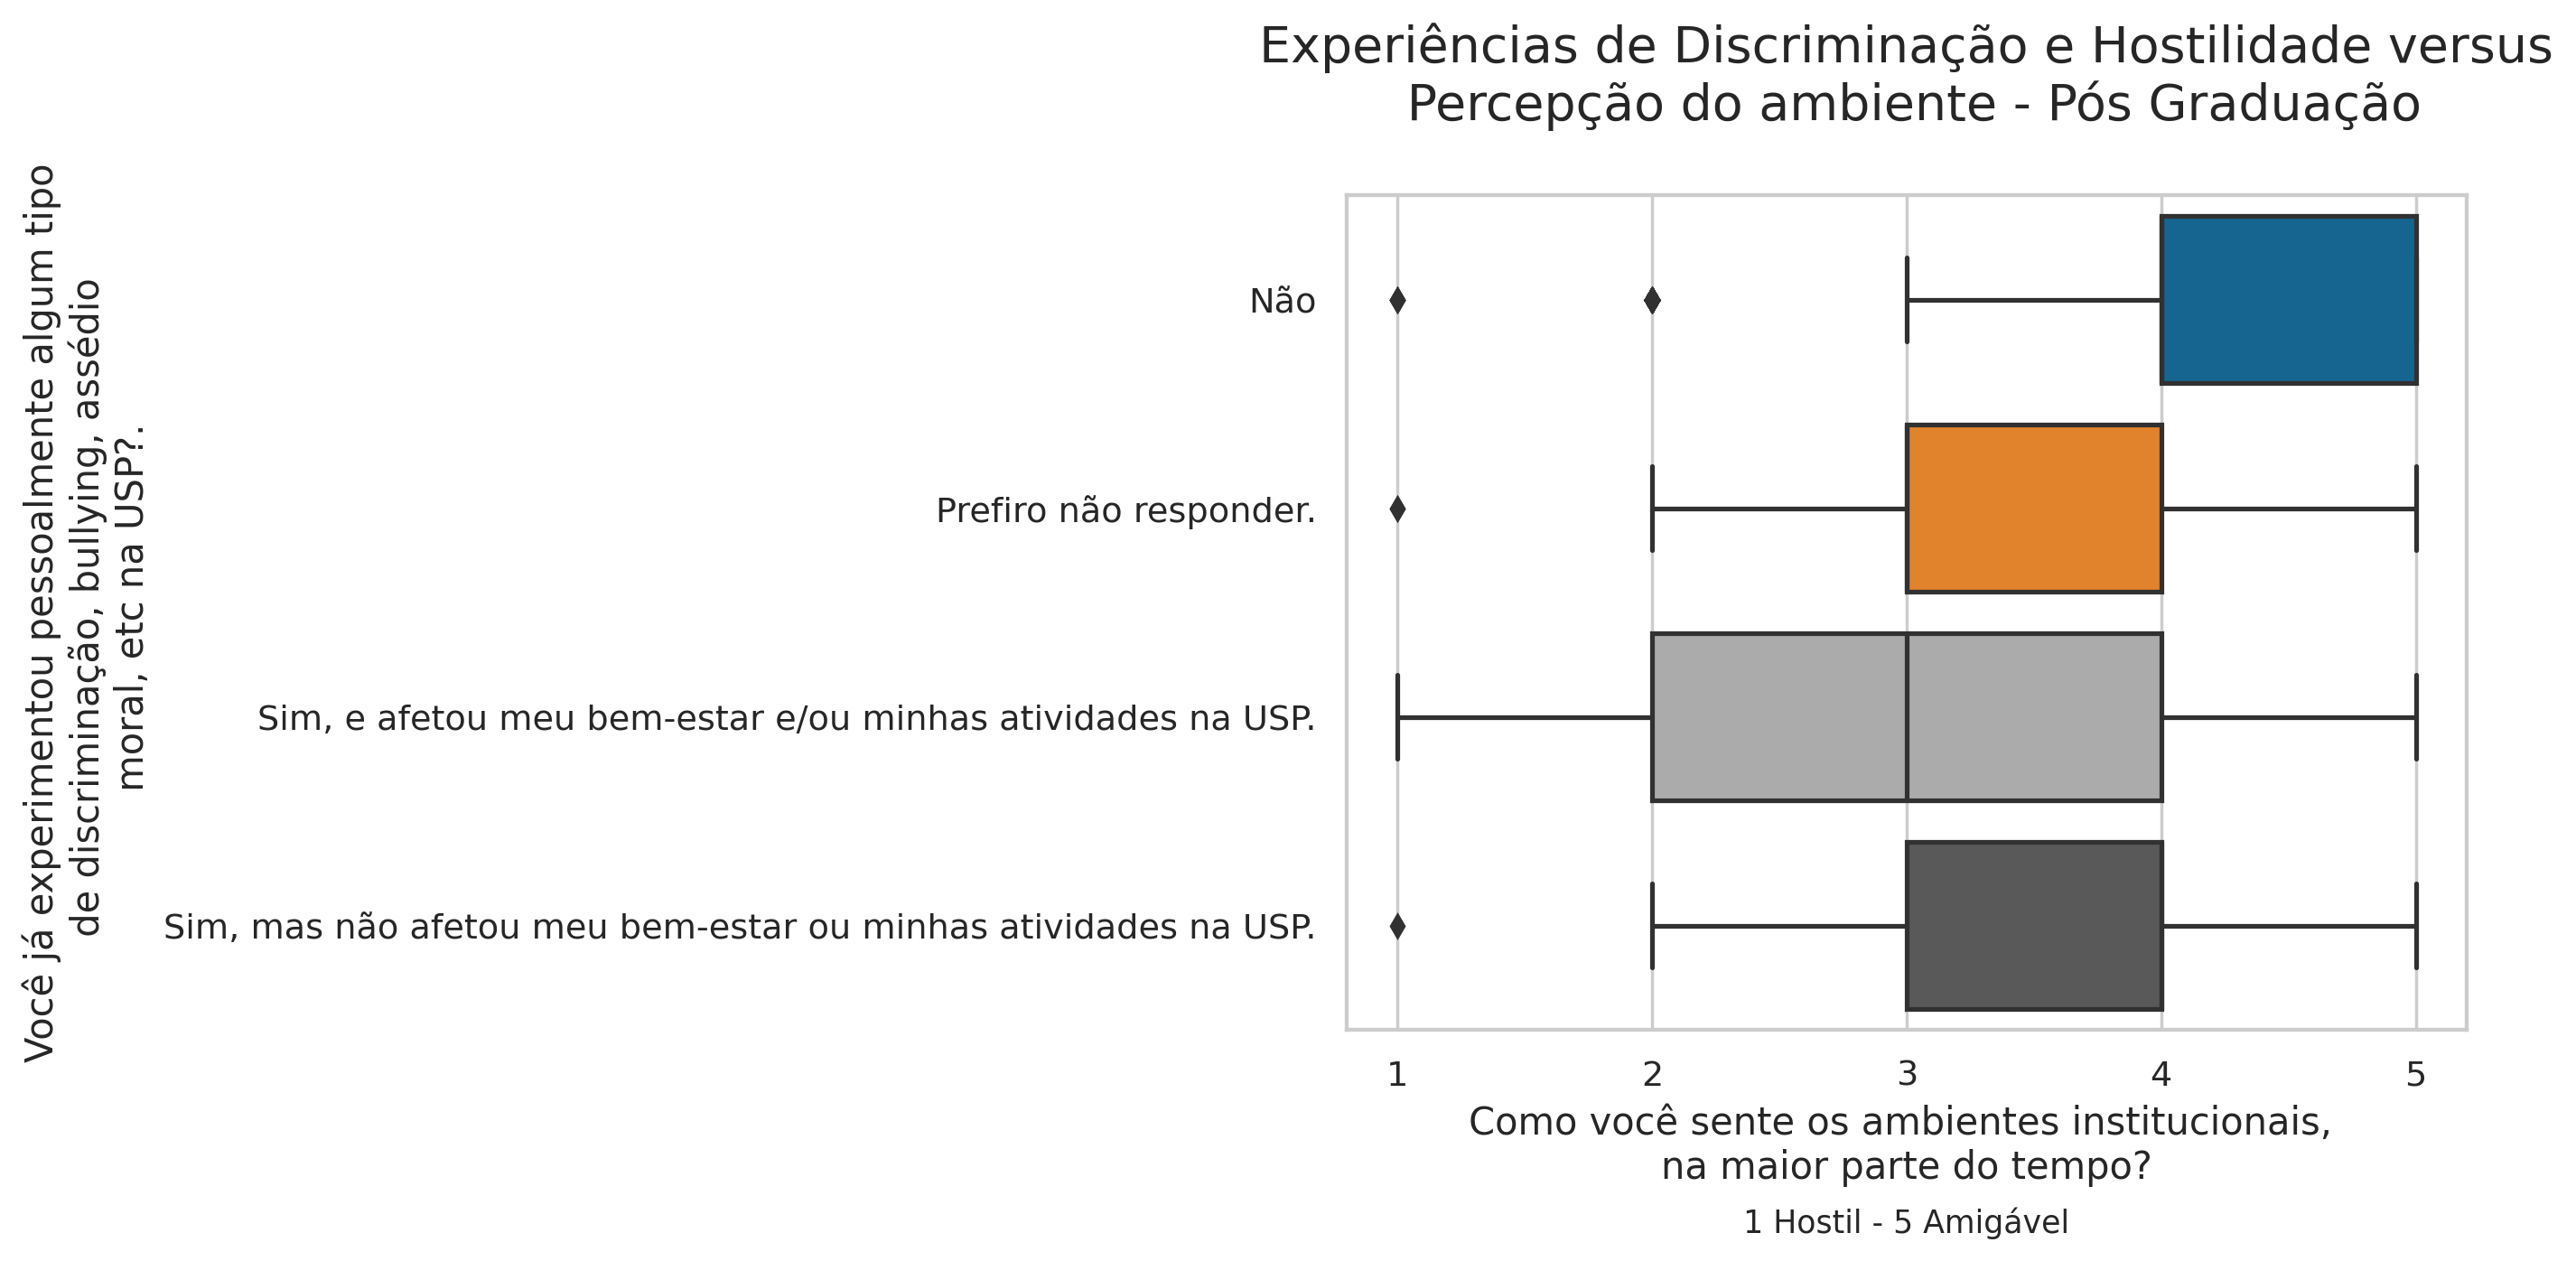

In [ ]:
plt.figure()

ax = sns.boxplot(x = df_pos_graduacao['hostil - amigável'], y= df_pos_graduacao['Você já experimentou pessoalmente algum tipo de discriminação, comportamento intimidador, hostilidade, bullying ou assédio moral na USP?'], order=['Não', 'Prefiro não responder.', 'Sim, e afetou meu bem-estar e/ou minhas atividades na USP.', 'Sim, mas não afetou meu bem-estar ou minhas atividades na USP.'])

ax.set(ylabel='Você já experimentou pessoalmente algum tipo\n de discriminação, bullying, assédio\n moral, etc na USP?.', xlabel = 'Como você sente os ambientes institucionais, \nna maior parte do tempo?')

plt.title('Experiências de Discriminação e Hostilidade versus\n Percepção do ambiente - Pós Graduação\n', fontsize=16)

plt.text(0.5, -0.25, r'1 Hostil - 5 Amigável',
         fontsize=10,  # Tamanho de fonte para a parte específica do texto
         ha='center', va='bottom', transform=plt.gca().transAxes)
# Definir os rótulos do eixo x como inteiros
plt.xticks(ticks=range(1, 6), labels=range(1, 6))

plt.show()

#### Pós Doutorado

In [ ]:
tab_bulliyng_pos_doc = pd.crosstab(df_pos_doutorado['hostil - amigável'], df_pos_doutorado['Você já experimentou pessoalmente algum tipo de discriminação, comportamento intimidador, hostilidade, bullying ou assédio moral na USP?'])

tab_bulliyng_pos_doc

"Você já experimentou pessoalmente algum tipo de discriminação, comportamento intimidador, hostilidade, bullying ou assédio moral na USP?",Não,Prefiro não responder.,"Sim, e afetou meu bem-estar e/ou minhas atividades na USP.","Sim, mas não afetou meu bem-estar ou minhas atividades na USP."
hostil - amigável,,,,
1,3,0,1,0
2,2,1,8,4
3,26,5,18,6
4,78,5,22,16
5,94,2,4,11


In [ ]:
df_pos_doutorado['hostil - amigável'] = df_pos_doutorado['hostil - amigável'].astype(int)

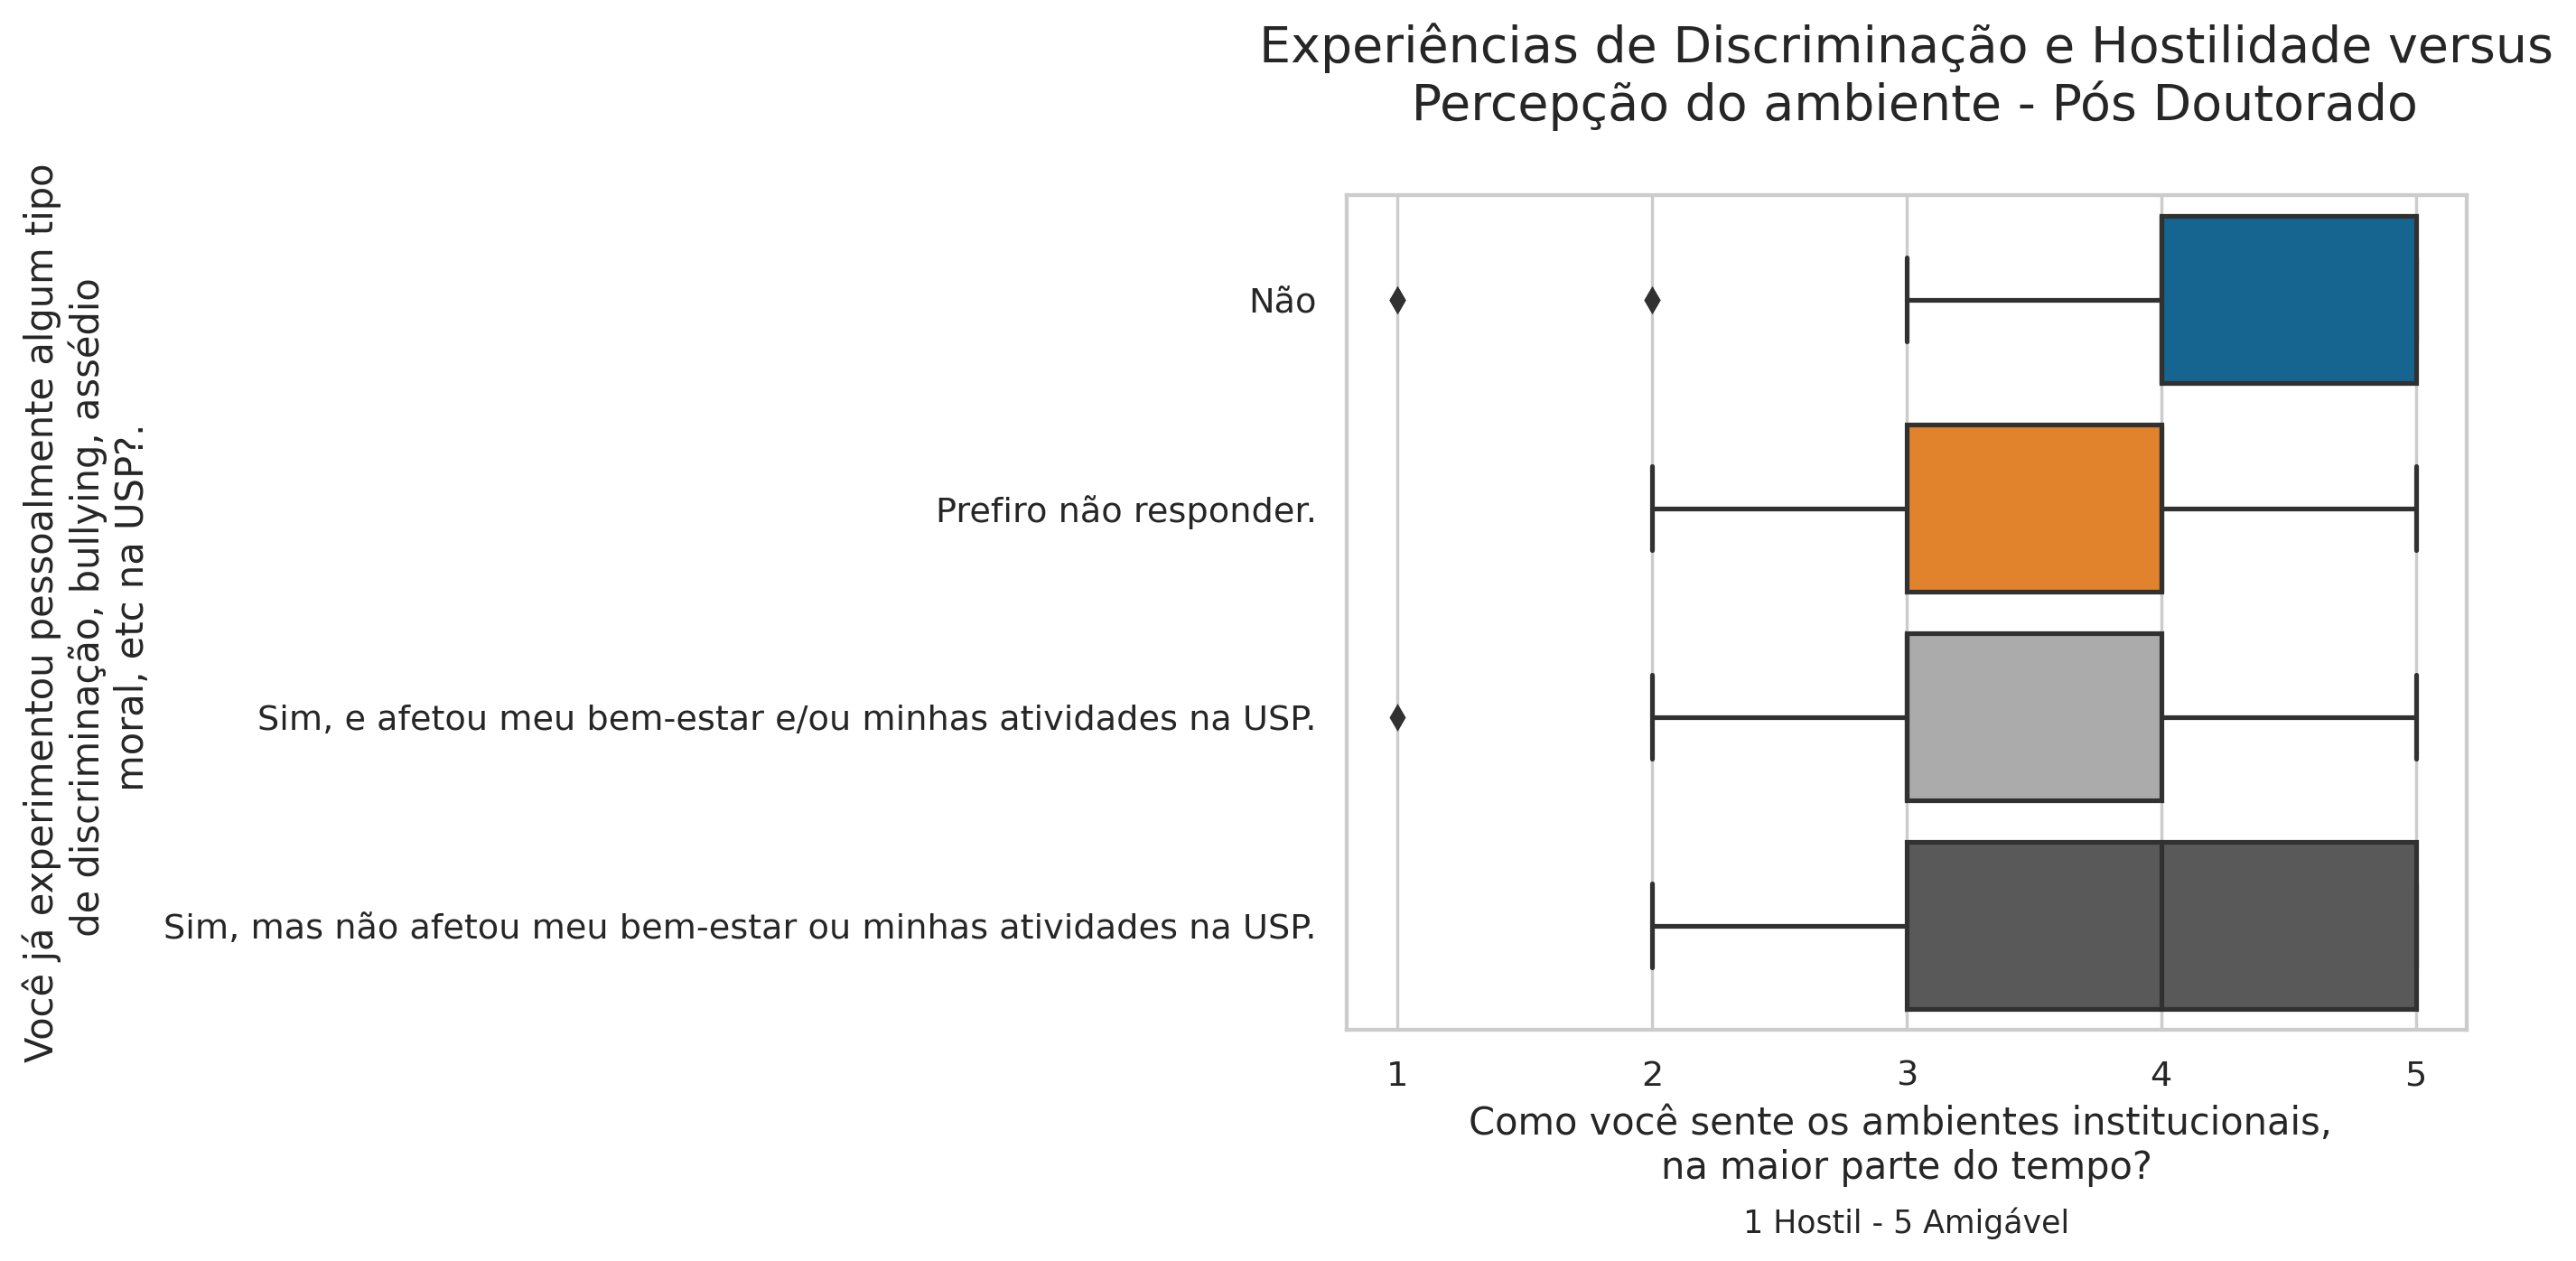

In [ ]:
plt.figure()

ax = sns.boxplot(x = df_pos_doutorado['hostil - amigável'], y= df_pos_doutorado['Você já experimentou pessoalmente algum tipo de discriminação, comportamento intimidador, hostilidade, bullying ou assédio moral na USP?'], order=['Não', 'Prefiro não responder.', 'Sim, e afetou meu bem-estar e/ou minhas atividades na USP.', 'Sim, mas não afetou meu bem-estar ou minhas atividades na USP.'])

ax.set(ylabel='Você já experimentou pessoalmente algum tipo\n de discriminação, bullying, assédio\n moral, etc na USP?.', xlabel = 'Como você sente os ambientes institucionais, \nna maior parte do tempo?')

plt.title('Experiências de Discriminação e Hostilidade versus\n Percepção do ambiente - Pós Doutorado\n', fontsize=16)

plt.text(0.5, -0.25, r'1 Hostil - 5 Amigável',
         fontsize=10,  # Tamanho de fonte para a parte específica do texto
         ha='center', va='bottom', transform=plt.gca().transAxes)
# Definir os rótulos do eixo x como inteiros
plt.xticks(ticks=range(1, 6), labels=range(1, 6))

plt.show()

---

## Percepção do ambiente vs Posição institucional